In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import tabulate
import sys
import io
import seaborn as sns

In [2]:
file_paths = [
	'./Data/all_alpha_08.xls',
	'./Data/all_alpha_09.xls',
	'./Data/all_alpha_10.xls',
	'./Data/all_alpha_11.xlsx',
	'./Data/all_alpha_12.xlsx',
	'./Data/all_alpha_13.xlsx',
	'./Data/all_alpha_14.xlsx',
	'./Data/all_alpha_15.xlsx',
	'./Data/all_alpha_16.xlsx',
	'./Data/all_alpha_17.xlsx',
	'./Data/all_alpha_18.xlsx'
]


df_list = [pd.read_excel(file, engine="xlrd" if file.endswith('.xls') else 'openpyxl') for file in file_paths]

In [3]:
def create_table(task, header, data: list = df_list, start_year: int = 2008, table_design='plain', vertical=False, expand=False):
	table = []
	for i, df in enumerate(data, start=start_year):
		store = task(df)
		if expand:
			table.append([f"df_{i}", *store])
		else:
			table.append([f"df_{i}", store])
	
	if vertical:
		table = list(map(list, zip(*([header] + table))))
		header=[]

	print(tabulate.tabulate(tabular_data = table, headers=header, tablefmt=table_design))

### Basic Exploration

Number of Sample in each Year

In [4]:
def get_sample(data: pd.DataFrame):
	"""Returns the number of samples in a DataFrame."""
	return data.size

create_table(header=["Dataset", "Number of Samples"], table_design="grid", task=get_sample)

+-----------+---------------------+
| Dataset   |   Number of Samples |
+===========+=====================+
| df_2008   |               43272 |
+-----------+---------------------+
| df_2009   |               43537 |
+-----------+---------------------+
| df_2010   |               39542 |
+-----------+---------------------+
| df_2011   |               36907 |
+-----------+---------------------+
| df_2012   |               38284 |
+-----------+---------------------+
| df_2013   |               43146 |
+-----------+---------------------+
| df_2014   |               45306 |
+-----------+---------------------+
| df_2015   |               47754 |
+-----------+---------------------+
| df_2016   |               46602 |
+-----------+---------------------+
| df_2017   |               46602 |
+-----------+---------------------+
| df_2018   |               48834 |
+-----------+---------------------+


Number of Columns in each dataset

In [5]:
def get_columns(data: pd.DataFrame):
	return [data.shape[0], data.shape[1]]

create_table(task=get_columns, header=["Dataset","Number of Row" ,"Number of Columns"], table_design="grid", expand=True)

+-----------+-----------------+---------------------+
| Dataset   |   Number of Row |   Number of Columns |
+===========+=================+=====================+
| df_2008   |            2404 |                  18 |
+-----------+-----------------+---------------------+
| df_2009   |            2561 |                  17 |
+-----------+-----------------+---------------------+
| df_2010   |            2326 |                  17 |
+-----------+-----------------+---------------------+
| df_2011   |            2171 |                  17 |
+-----------+-----------------+---------------------+
| df_2012   |            2252 |                  17 |
+-----------+-----------------+---------------------+
| df_2013   |            2397 |                  18 |
+-----------+-----------------+---------------------+
| df_2014   |            2517 |                  18 |
+-----------+-----------------+---------------------+
| df_2015   |            2653 |                  18 |
+-----------+---------------

Columns

In [6]:
def get_columns_values(data: pd.DataFrame):
	Columns_value = data.columns.values
	returner = ''
	for value in Columns_value:
		returner += f'{value:<20}\n'
	return returner

create_table(task=get_columns_values, header=["Dataset", "Columns"], table_design="grid", vertical=False)

+-----------+----------------------+
| Dataset   | Columns              |
+===========+======================+
| df_2008   | Model                |
|           | Displ                |
|           | Cyl                  |
|           | Trans                |
|           | Drive                |
|           | Fuel                 |
|           | Sales Area           |
|           | Stnd                 |
|           | Underhood ID         |
|           | Veh Class            |
|           | Air Pollution Score  |
|           | FE Calc Appr         |
|           | City MPG             |
|           | Hwy MPG              |
|           | Cmb MPG              |
|           | Unadj Cmb MPG        |
|           | Greenhouse Gas Score |
|           | SmartWay             |
+-----------+----------------------+
| df_2009   | Model                |
|           | Displ                |
|           | Cyl                  |
|           | Trans                |
|           | Drive                |
|

Duplicate rows in each dataset

In [7]:
def get_duplicate(data: pd.DataFrame):
	return data.duplicated().sum()

create_table(task=get_duplicate, header=["dataset", "Number of duplicate"], table_design="grid")

+-----------+-----------------------+
| dataset   |   Number of duplicate |
+===========+=======================+
| df_2008   |                    25 |
+-----------+-----------------------+
| df_2009   |                    43 |
+-----------+-----------------------+
| df_2010   |                    28 |
+-----------+-----------------------+
| df_2011   |                    30 |
+-----------+-----------------------+
| df_2012   |                    40 |
+-----------+-----------------------+
| df_2013   |                    27 |
+-----------+-----------------------+
| df_2014   |                    22 |
+-----------+-----------------------+
| df_2015   |                    38 |
+-----------+-----------------------+
| df_2016   |                     0 |
+-----------+-----------------------+
| df_2017   |                     0 |
+-----------+-----------------------+
| df_2018   |                     0 |
+-----------+-----------------------+


Datatype in Columns

In [8]:
def get_info(data: pd.DataFrame):
	buffer = io.StringIO()
	data.info(buf=buffer)
	return buffer.getvalue()

create_table(task=get_info, header=["Dataset", "Info"], vertical=True, table_design="grid")

+---------+----------------------------------------------------+----------------------------------------------------+----------------------------------------------------+----------------------------------------------------+----------------------------------------------------+----------------------------------------------------+----------------------------------------------------+----------------------------------------------------+----------------------------------------------------+----------------------------------------------------+----------------------------------------------------+
| Dataset | df_2008                                            | df_2009                                            | df_2010                                            | df_2011                                            | df_2012                                            | df_2013                                            | df_2014                                            | df_2015               

Check Null

In [9]:
def get_total_null(data):
	return data.isnull().sum().sum()

create_table(task=get_total_null, header=["Dataset", "Missing values"], vertical=True, table_design="grid")

+----------------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+
| Dataset        | df_2008 | df_2009 | df_2010 | df_2011 | df_2012 | df_2013 | df_2014 | df_2015 | df_2016 | df_2017 | df_2018 |
+----------------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+
| Missing values | 1685    | 990     | 690     | 590     | 604     | 885     | 1045    | 1404    | 120     | 124     | 100     |
+----------------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+


In [10]:
def get_null_value(data: pd.DataFrame):
	null_value_counts = data.isnull().sum()
	returner = ''
	for left, right in zip(null_value_counts.index, null_value_counts.values):
		returner += f'{left:<21}{right:>10}\n'
	return returner

create_table(task=get_null_value, header=["Dataset", "Missing Value"], table_design="grid", vertical=True)

# get_null_value(df_list[0])

+---------------+---------------------------------+---------------------------------+---------------------------------+---------------------------------+---------------------------------+---------------------------------+---------------------------------+---------------------------------+---------------------------------+---------------------------------+---------------------------------+
| Dataset       | df_2008                         | df_2009                         | df_2010                         | df_2011                         | df_2012                         | df_2013                         | df_2014                         | df_2015                         | df_2016                         | df_2017                         | df_2018                         |
+---------------+---------------------------------+---------------------------------+---------------------------------+---------------------------------+---------------------------------+-----------------------------

Number of Non-Null Unique values for features in each dataset

In [11]:
def get_nunique(data: pd.DataFrame):
	Nunique_value = data.nunique()
	returner = ''
	for left, right in zip(Nunique_value.index, Nunique_value.values):
		returner += f'{left:<21}{right:>10}\n'
	return returner

create_table(task=get_nunique, header=["dataset", "Number of Non-Null Unique"], vertical=True, table_design="grid")

+---------------------------+---------------------------------+---------------------------------+---------------------------------+---------------------------------+---------------------------------+---------------------------------+---------------------------------+---------------------------------+---------------------------------+---------------------------------+---------------------------------+
| dataset                   | df_2008                         | df_2009                         | df_2010                         | df_2011                         | df_2012                         | df_2013                         | df_2014                         | df_2015                         | df_2016                         | df_2017                         | df_2018                         |
+---------------------------+---------------------------------+---------------------------------+---------------------------------+---------------------------------+---------------------------

### Cleaning Columns

Rename Columns

In [12]:
for df in df_list:
	Renaming = {
		'Sales Area': 'Cert Region',
		'Model': 'Vehicle Model',
		'Cyl': 'Engine Cylinders',
		'Trans': 'Transmission Type',
		'Displ': 'Engine Displacement L',
		'Cmb MPG': 'Combined MPG',
	}
	df.rename(columns=Renaming, inplace=True)
	df.rename(columns=lambda x: x.strip().title().replace(" ", "_"), inplace=True)

create_table(task=get_columns_values, header=["Dataset", "Info"], vertical=True, table_design="grid")


+---------+-----------------------+-----------------------+-----------------------+-----------------------+-----------------------+-----------------------+-----------------------+-----------------------+-----------------------+-----------------------+-----------------------+
| Dataset | df_2008               | df_2009               | df_2010               | df_2011               | df_2012               | df_2013               | df_2014               | df_2015               | df_2016               | df_2017               | df_2018               |
+---------+-----------------------+-----------------------+-----------------------+-----------------------+-----------------------+-----------------------+-----------------------+-----------------------+-----------------------+-----------------------+-----------------------+
| Info    | Vehicle_Model         | Vehicle_Model         | Vehicle_Model         | Vehicle_Model         | Vehicle_Model         | Vehicle_Model         | Vehicle_Model   

Check if all dataset has same Features

In [13]:
# ANSI color codes
GREEN = "\033[92m"  # Green for "YES"
RED = "\033[91m"    # Red for "NO"
RESET = "\033[0m"   # Reset color

right = f"{GREEN}YES{RESET}"
wrong = f"{RED}NO{RESET}"

all_columns = sorted(set(col for df in df_list for col in df.columns))

table = []
for col in all_columns:
	row = [col] + [right if col in df.columns else wrong for df in df_list]
	table.append(row)

headers = ["Column Name"] + [f"df_{i}" for i in range(len(df_list))]

print(tabulate.tabulate(table, headers=headers, tablefmt="grid",  colalign=("left",) + ("center",) * len(df_list)))

+-----------------------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+---------+
| Column Name           |  df_0  |  df_1  |  df_2  |  df_3  |  df_4  |  df_5  |  df_6  |  df_7  |  df_8  |  df_9  |  df_10  |
+=======================+========+========+========+========+========+========+========+========+========+========+=========+
| Air_Pollution_Score   |  YES   |  YES   |  YES   |  YES   |  YES   |  YES   |  YES   |  YES   |  YES   |  YES   |   YES   |
+-----------------------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+---------+
| Cert_Region           |  YES   |  YES   |  YES   |  YES   |  YES   |  YES   |  YES   |  YES   |  YES   |  YES   |   YES   |
+-----------------------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+---------+
| City_Mpg              |  YES   |  YES   |  YES   |  YES   |  YES   |  YES   |  YES   |  YES   |  YES   |  YES   |   

Drop Entraneous Columns

In [14]:
for df in df_list:
	Useless_Features = [
		'Stnd',
		'Stnd_Description',
		'Fe_Calc_Appr',
		'Unadj_Cmb_Mpg',
		'Comb_Co2',
		# 'Underhood_Id',
	]
	df.drop(columns=[col for col in Useless_Features if col in df.columns], inplace=True)

create_table(task=get_info, header=["Dataset", "Info"], vertical=True, table_design="grid")

+---------+-----------------------------------------------------+-----------------------------------------------------+-----------------------------------------------------+-----------------------------------------------------+-----------------------------------------------------+-----------------------------------------------------+-----------------------------------------------------+-----------------------------------------------------+-----------------------------------------------------+-----------------------------------------------------+-----------------------------------------------------+
| Dataset | df_2008                                             | df_2009                                             | df_2010                                             | df_2011                                             | df_2012                                             | df_2013                                             | df_2014                                             | df_2

Drop Missing Value

In [15]:
for data in df_list:
	data.dropna(inplace=True)

create_table(task=get_total_null, header=["dataset", "Number of Missing Value"], vertical=True, table_design="grid")

+-------------------------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+
| dataset                 | df_2008 | df_2009 | df_2010 | df_2011 | df_2012 | df_2013 | df_2014 | df_2015 | df_2016 | df_2017 | df_2018 |
+-------------------------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+
| Number of Missing Value | 0       | 0       | 0       | 0       | 0       | 0       | 0       | 0       | 0       | 0       | 0       |
+-------------------------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+


Remove Duplicate Data

In [16]:
for data in df_list:
	data.drop_duplicates(inplace=True)

create_table(task=get_duplicate, header=["dataset", "Number of Duplicate Values"], vertical=True, table_design="grid")

+----------------------------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+
| dataset                    | df_2008 | df_2009 | df_2010 | df_2011 | df_2012 | df_2013 | df_2014 | df_2015 | df_2016 | df_2017 | df_2018 |
+----------------------------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+
| Number of Duplicate Values | 0       | 0       | 0       | 0       | 0       | 0       | 0       | 0       | 0       | 0       | 0       |
+----------------------------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+


### Handling Data Inconsistencies

In [17]:
create_table(task=get_info, header=["Dataset", "Info"], vertical=True, table_design="grid")

+---------+-----------------------------------------------------+-----------------------------------------------------+-----------------------------------------------------+-----------------------------------------------------+-----------------------------------------------------+-----------------------------------------------------+-----------------------------------------------------+-----------------------------------------------------+-----------------------------------------------------+-----------------------------------------------------+-----------------------------------------------------+
| Dataset | df_2008                                             | df_2009                                             | df_2010                                             | df_2011                                             | df_2012                                             | df_2013                                             | df_2014                                             | df_2

Handling Features with Hybrid Value

In [18]:
hybrid = pd.DataFrame()
for data in df_list:
	all_hybrid = data[data['Fuel'].str.contains('/')]
	hybrid = pd.concat([hybrid, all_hybrid], axis=0)
	
hybrid

,Vehicle_Model,Engine_Displacement_L,Engine_Cylinders,Transmission_Type,Drive,Fuel,Cert_Region,Underhood_Id,Veh_Class,Air_Pollution_Score,City_Mpg,Hwy_Mpg,Combined_Mpg,Greenhouse_Gas_Score,Smartway
316,CHEVROLET Avalanche 1500,5.3,(8 cyl),Auto-L4,2WD,ethanol/gas,FC,8GMXT05.3381,SUV,7/7,11/14,15/20,12/16,6/4,no
317,CHEVROLET Avalanche 1500,5.3,(8 cyl),Auto-L4,4WD,ethanol/gas,FC,8GMXT05.3381,SUV,7/7,11/14,14/19,12/16,6/4,no
321,CHEVROLET Avalanche 1500,5.3,(8 cyl),Auto-L4,2WD,ethanol/gas,FC,8GMXT05.3373,SUV,6/6,11/14,15/20,12/16,6/4,no
322,CHEVROLET Avalanche 1500,5.3,(8 cyl),Auto-L4,4WD,ethanol/gas,FC,8GMXT05.3373,SUV,6/6,11/14,14/19,12/16,6/4,no
380,CHEVROLET Express 1500,5.3,(8 cyl),Auto-L4,4WD,ethanol/gas,FC,8GMXT05.3373,van,6/6,9/12,12/16,10/14,4/2,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2680,VOLVO S90,2.0,4.0,SemiAuto-8,4WD,Gasoline/Electricity,FA,JVVXV02.0P30,midsize car,7,26/70,33/72,29/71,10,Elite
2703,VOLVO XC60,2.0,4.0,SemiAuto-8,4WD,Gasoline/Electricity,CA,JVVXJ02.0P30,small SUV,7,26/60,28/58,26/59,10,Elite
2704,VOLVO XC60,2.0,4.0,SemiAuto-8,4WD,Gasoline/Electricity,FA,JVVXJ02.0P30,small SUV,7,26/60,28/58,26/59,10,Elite
2711,VOLVO XC90,2.0,4.0,SemiAuto-8,4WD,Gasoline/Electricity,CA,JVVXJ02.0P30,standard SUV,7,26/63,30/61,27/62,10,Elite


In [19]:
# Split(value/value) => (value, value)

In [20]:
def spliter(data: pd.DataFrame, list_two_value_features: list):
  df_1 = data.copy()
  df_2 = data.copy()

  for features in list_two_value_features:
    df_1[features] = df_1[features].astype(str).apply(lambda x: x.split("/")[0])
    df_2[features] = df_2[features].astype(str).apply(
            lambda x: x.split("/")[1] if "/" in x else x
        )

  return df_1, df_2

In [21]:
list_two_value_features = ['Fuel', 'Air_Pollution_Score', 'City_Mpg', 'Hwy_Mpg', 'Combined_Mpg', 'Greenhouse_Gas_Score']

for i, data in enumerate(df_list):
  selected_data = data[data['Fuel'].astype(str).str.contains('/')]
  
  if selected_data.empty:
    continue  # Skip iteration if no values contain '/'

  new_df_1, new_df_2 = spliter(selected_data, list_two_value_features)

  data.drop(selected_data.index, inplace=True)
  df_list[i] = pd.concat([data, new_df_1, new_df_2], ignore_index=True)

In [22]:
hybrid = pd.DataFrame()
for data in df_list:
	all_hybrid = data[data['Fuel'].str.contains('/')]
	hybrid = pd.concat([hybrid, all_hybrid], axis=0)
	
hybrid

,Vehicle_Model,Engine_Displacement_L,Engine_Cylinders,Transmission_Type,Drive,Fuel,Cert_Region,Underhood_Id,Veh_Class,Air_Pollution_Score,City_Mpg,Hwy_Mpg,Combined_Mpg,Greenhouse_Gas_Score,Smartway


In [23]:
create_table(task=get_duplicate, header=["Dataset", "Air Pollution Score"], table_design="grid", vertical=True)

+---------------------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+
| Dataset             | df_2008 | df_2009 | df_2010 | df_2011 | df_2012 | df_2013 | df_2014 | df_2015 | df_2016 | df_2017 | df_2018 |
+---------------------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+
| Air Pollution Score | 0       | 0       | 4       | 9       | 4       | 2       | 4       | 0       | 0       | 3       | 4       |
+---------------------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+


In [24]:
for data in df_list:
  data.drop_duplicates(inplace=True)

create_table(task=get_duplicate, header=["dataset", "Number of Duplicate Values"], vertical=True, table_design="grid")

+----------------------------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+
| dataset                    | df_2008 | df_2009 | df_2010 | df_2011 | df_2012 | df_2013 | df_2014 | df_2015 | df_2016 | df_2017 | df_2018 |
+----------------------------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+
| Number of Duplicate Values | 0       | 0       | 0       | 0       | 0       | 0       | 0       | 0       | 0       | 0       | 0       |
+----------------------------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+


Handling Fuel Data Inconsistencies

In [25]:
def get_fuel(data: pd.DataFrame):
	Fuel_count = data['Fuel'].value_counts()
	returner = ''
	for fuel, value in Fuel_count.items():
		returner += f'{fuel:<20}{value:>10}\n'
	return returner

create_table(task=get_fuel, header=["Dataset", "Fuel"], table_design="grid", vertical=True)

+---------+--------------------------------+--------------------------------+--------------------------------+--------------------------------+--------------------------------+--------------------------------+--------------------------------+--------------------------------+--------------------------------+--------------------------------+--------------------------------+
| Dataset | df_2008                        | df_2009                        | df_2010                        | df_2011                        | df_2012                        | df_2013                        | df_2014                        | df_2015                        | df_2016                        | df_2017                        | df_2018                        |
+---------+--------------------------------+--------------------------------+--------------------------------+--------------------------------+--------------------------------+--------------------------------+--------------------------------+--------

In [26]:
fuel_mapping = {
  "gasoline": "Gasoline",
  "ethanol": "Ethanol",
  "gas": "Gas",
  "diesel": "Diesel",
  "cng": "CNG",
  "electricity": "Electricity",
  "electricty": "Electricity",
}

def rename_fuel(data):
  data['Fuel'] = data["Fuel"].str.lower().map(fuel_mapping)
  return data

for data in df_list:
  data = rename_fuel(data)

create_table(task=get_fuel, header=["dataset", "Fuel"], start_year=2008, table_design="grid", vertical=True)


+---------+--------------------------------+--------------------------------+--------------------------------+--------------------------------+--------------------------------+--------------------------------+--------------------------------+--------------------------------+--------------------------------+--------------------------------+--------------------------------+
| dataset | df_2008                        | df_2009                        | df_2010                        | df_2011                        | df_2012                        | df_2013                        | df_2014                        | df_2015                        | df_2016                        | df_2017                        | df_2018                        |
+---------+--------------------------------+--------------------------------+--------------------------------+--------------------------------+--------------------------------+--------------------------------+--------------------------------+--------

Fix Engine Cylinder 

In [27]:
def get_engine_cylinders(data: pd.DataFrame):
  Count = data['Engine_Cylinders'].value_counts()
  returner = ''
  for value, count in Count.items():
    returner += f'{value:<10}{count:>10}\n'
  return returner

create_table(task=get_engine_cylinders, header=["Dataset", "Engine Cylinders"], table_design="grid", vertical=True)

+------------------+----------------------+----------------------+----------------------+----------------------+----------------------+----------------------+----------------------+----------------------+----------------------+----------------------+----------------------+
| Dataset          | df_2008              | df_2009              | df_2010              | df_2011              | df_2012              | df_2013              | df_2014              | df_2015              | df_2016              | df_2017              | df_2018              |
+------------------+----------------------+----------------------+----------------------+----------------------+----------------------+----------------------+----------------------+----------------------+----------------------+----------------------+----------------------+
| Engine Cylinders | (6 cyl)          873 | 6.0              858 | 6.0              819 | 6.0              815 | 4.0              816 | 4.0              960 | 4.0             100

In [28]:
for data in df_list:
    data['Engine_Cylinders'] = data['Engine_Cylinders'].astype(str).str.extract(r'(\d+)').astype(float).astype('Int64')

create_table(task=get_engine_cylinders, header=["Dataset", "Engine Cylinders"], table_design="grid", vertical=True)

+------------------+----------------------+----------------------+----------------------+----------------------+----------------------+----------------------+----------------------+----------------------+----------------------+----------------------+----------------------+
| Dataset          | df_2008              | df_2009              | df_2010              | df_2011              | df_2012              | df_2013              | df_2014              | df_2015              | df_2016              | df_2017              | df_2018              |
+------------------+----------------------+----------------------+----------------------+----------------------+----------------------+----------------------+----------------------+----------------------+----------------------+----------------------+----------------------+
| Engine Cylinders | 6                873 | 6                858 | 6                819 | 6                815 | 4                816 | 4                960 | 4               100

In [29]:
# Check if Null values
def get_engine_cylinders_null_count(data: pd.DataFrame):
	Count = data['Engine_Cylinders'].isnull().sum()
	return Count

create_table(task=get_engine_cylinders_null_count, header=["Dataset", "Engine Cylinders"], table_design="grid", vertical=True)

+------------------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+
| Dataset          | df_2008 | df_2009 | df_2010 | df_2011 | df_2012 | df_2013 | df_2014 | df_2015 | df_2016 | df_2017 | df_2018 |
+------------------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+
| Engine Cylinders | 0       | 0       | 0       | 0       | 0       | 0       | 0       | 0       | 0       | 0       | 0       |
+------------------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+


Fix Drive

In [30]:
def get_drive(data: pd.DataFrame):
  Count = data['Drive'].value_counts()
  returner = ''
  for value, count in Count.items():
    returner += f'{value:<10}{count:>10}\n'
  return returner

create_table(task=get_drive, header=["Dataset", "Drive"], table_design="grid", vertical=True)

+---------+----------------------+----------------------+----------------------+----------------------+----------------------+----------------------+----------------------+----------------------+----------------------+----------------------+----------------------+
| Dataset | df_2008              | df_2009              | df_2010              | df_2011              | df_2012              | df_2013              | df_2014              | df_2015              | df_2016              | df_2017              | df_2018              |
+---------+----------------------+----------------------+----------------------+----------------------+----------------------+----------------------+----------------------+----------------------+----------------------+----------------------+----------------------+
| Drive   | 2WD             1502 | 2WD             1657 | 2WD             1525 | 2WD             1425 | 2WD             1519 | 2WD             1577 | 2WD             1587 | 2WD             1575 | 2WD      

In [31]:
for data in df_list:
    data['Drive'] = data['Drive'].astype(str).str.extract(r'(\d+)').astype(float).astype('int64')

create_table(task=get_drive, header=["Dataset", "Drive"], table_design="grid", vertical=True)

+---------+----------------------+----------------------+----------------------+----------------------+----------------------+----------------------+----------------------+----------------------+----------------------+----------------------+----------------------+
| Dataset | df_2008              | df_2009              | df_2010              | df_2011              | df_2012              | df_2013              | df_2014              | df_2015              | df_2016              | df_2017              | df_2018              |
+---------+----------------------+----------------------+----------------------+----------------------+----------------------+----------------------+----------------------+----------------------+----------------------+----------------------+----------------------+
| Drive   | 2               1502 | 2               1657 | 2               1525 | 2               1425 | 2               1519 | 2               1577 | 2               1587 | 2               1575 | 2        

In [32]:
# Check if Null values
def get_drive_null_count(data: pd.DataFrame):
	Count = data['Drive'].isnull().sum()
	return Count

create_table(task=get_drive_null_count, header=["Dataset", "Drive"], table_design="grid", vertical=True)

+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+
| Dataset | df_2008 | df_2009 | df_2010 | df_2011 | df_2012 | df_2013 | df_2014 | df_2015 | df_2016 | df_2017 | df_2018 |
+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+
| Drive   | 0       | 0       | 0       | 0       | 0       | 0       | 0       | 0       | 0       | 0       | 0       |
+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+


Fix Air Pollution Score

In [33]:
def get_air_pollution_score(data: pd.DataFrame):
  Count = data['Air_Pollution_Score'].value_counts()
  returner = ''
  for Score, count in Count.items():
    returner += f'{Score:<5}{count:>7}\n'
  return returner


create_table(task=get_air_pollution_score, header=["Dataset", "Air Pollution Score"], table_design="grid", vertical=True)

+---------------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+
| Dataset             | df_2008      | df_2009      | df_2010      | df_2011      | df_2012      | df_2013      | df_2014      | df_2015      | df_2016      | df_2017      | df_2018      |
+---------------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+
| Air Pollution Score | 6       1519 | 6       1620 | 6       1348 | 5       1206 | 5       1181 | 5       1166 | 5       1134 | 5       1111 | 5        996 | 6       1327 | 3       1112 |
|                     | 7        538 | 7        674 | 7        684 | 6        728 | 6        823 | 6        894 | 6        990 | 6       1006 | 6        959 | 5        363 | 5        636 |
|                     | 9.5       80 | 9.5      104 | 9

In [34]:
# Replace Mod with 4
def replace_mod(score):
    if score == "Mod":
        return "4"
    try:
        return score  # Convert all valid numbers to float
    except ValueError:
        print(f"Invalid value: {score}")
        return np.nan  # Handle unexpected invalid values

for data in df_list:
  data['Air_Pollution_Score'] = data['Air_Pollution_Score'].apply(replace_mod).astype(float)

create_table(task=get_air_pollution_score, header=["Dataset", "Air Pollution Score"], table_design="grid", vertical=True)

+---------------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+
| Dataset             | df_2008      | df_2009      | df_2010      | df_2011      | df_2012      | df_2013      | df_2014      | df_2015      | df_2016      | df_2017      | df_2018      |
+---------------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+
| Air Pollution Score | 6.0     1519 | 6.0     1620 | 6.0     1348 | 5.0     1206 | 5.0     1181 | 5.0     1166 | 5.0     1134 | 5.0     1111 | 6.0     1163 | 6.0     1518 | 3.0     1280 |
|                     | 7.0      538 | 7.0      674 | 7.0      684 | 6.0      728 | 6.0      823 | 6.0      894 | 6.0      990 | 6.0     1006 | 5.0     1076 | 5.0      403 | 5.0      700 |
|                     | 9.5       80 | 9.5      104 | 9

In [35]:
# Check if Null values
def get_air_pollution_score_null_count(data: pd.DataFrame):
	Count = data['Air_Pollution_Score'].isnull().sum()
	return Count

create_table(task=get_air_pollution_score_null_count, header=["Dataset", "Count Null value of Air Pollution Score"], table_design="grid", vertical=True)

+-----------------------------------------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+
| Dataset                                 | df_2008 | df_2009 | df_2010 | df_2011 | df_2012 | df_2013 | df_2014 | df_2015 | df_2016 | df_2017 | df_2018 |
+-----------------------------------------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+
| Count Null value of Air Pollution Score | 0       | 0       | 0       | 0       | 0       | 0       | 0       | 0       | 0       | 0       | 0       |
+-----------------------------------------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+


Fix City Miles per gallon

In [36]:
def get_city_miles_per_gallon(data: pd.DataFrame):
  Count = data['City_Mpg'].value_counts().head(10)
  returner = ''
  for Score, count in Count.items():
    returner += f'{Score:<5}{count:>7}\n'
  return returner

create_table(task=get_city_miles_per_gallon, header=["Dataset", "City Miles Per Gallon"], table_design="grid", vertical=True)

+-----------------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+
| Dataset               | df_2008      | df_2009      | df_2010      | df_2011      | df_2012      | df_2013      | df_2014      | df_2015      | df_2016      | df_2017      | df_2018      |
+-----------------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+
| City Miles Per Gallon | 17       234 | 17       304 | 18       267 | 18       252 | 18       239 | 19       197 | 20       184 | 18       198 | 20       220 | 21       211 | 20       233 |
|                       | 15       219 | 14       253 | 17       236 | 17       218 | 19       195 | 18       185 | 18       177 | 19       190 | 19       209 | 20       210 | 16       227 |
|                       | 16       217 | 16  

In [37]:
def get_city_miles_per_gallon_type(data: pd.DataFrame):
	Count = data['City_Mpg'].dtypes
	return Count

create_table(task=get_city_miles_per_gallon_type, header=["Dataset", "Type of City Miles Per Gallon"], table_design="grid", vertical=True)

+-------------------------------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+
| Dataset                       | df_2008 | df_2009 | df_2010 | df_2011 | df_2012 | df_2013 | df_2014 | df_2015 | df_2016 | df_2017 | df_2018 |
+-------------------------------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+
| Type of City Miles Per Gallon | object  | object  | object  | object  | object  | object  | object  | object  | object  | object  | object  |
+-------------------------------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+


In [38]:
for data in df_list:
  data['City_Mpg'] = data['City_Mpg'].astype("int64")
  
create_table(task=get_city_miles_per_gallon_type, header=["Dataset", "Type of City Miles Per Gallon"], table_design="grid", vertical=True)

+-------------------------------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+
| Dataset                       | df_2008 | df_2009 | df_2010 | df_2011 | df_2012 | df_2013 | df_2014 | df_2015 | df_2016 | df_2017 | df_2018 |
+-------------------------------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+
| Type of City Miles Per Gallon | int64   | int64   | int64   | int64   | int64   | int64   | int64   | int64   | int64   | int64   | int64   |
+-------------------------------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+


In [39]:
# Check if Null values
def get_city_miles_per_gallon_null_count(data: pd.DataFrame):
	Count = data['City_Mpg'].isnull().sum()
	return Count

create_table(task=get_city_miles_per_gallon_null_count, header=["Dataset", "Count Null value of City Miles Per Gallon"], table_design="grid", vertical=True)

+-------------------------------------------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+
| Dataset                                   | df_2008 | df_2009 | df_2010 | df_2011 | df_2012 | df_2013 | df_2014 | df_2015 | df_2016 | df_2017 | df_2018 |
+-------------------------------------------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+
| Count Null value of City Miles Per Gallon | 0       | 0       | 0       | 0       | 0       | 0       | 0       | 0       | 0       | 0       | 0       |
+-------------------------------------------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+


Fix Highway Miles per gallon

In [40]:
def get_Highway_miles_per_gallon(data: pd.DataFrame):
  Count = data['Hwy_Mpg'].value_counts().head(10)
  returner = ''
  for Score, count in Count.items():
    returner += f'{Score:<5}{count:>7}\n'
  return returner

create_table(task=get_Highway_miles_per_gallon, header=["Dataset", "Highway Miles Per Gallon"], table_design="grid", vertical=True)

+--------------------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+
| Dataset                  | df_2008      | df_2009      | df_2010      | df_2011      | df_2012      | df_2013      | df_2014      | df_2015      | df_2016      | df_2017      | df_2018      |
+--------------------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+
| Highway Miles Per Gallon | 24       238 | 20       225 | 25       208 | 27       176 | 27       173 | 28       179 | 28       173 | 28       182 | 26       194 | 28       204 | 25       212 |
|                          | 20       189 | 25       219 | 27       184 | 25       171 | 25       168 | 25       154 | 25       144 | 26       150 | 31       185 | 30       175 | 28       205 |
|                          | 2

In [41]:
def get_Highway_miles_per_gallon_type(data: pd.DataFrame):
	Count = data['Hwy_Mpg'].dtypes
	return Count

create_table(task=get_Highway_miles_per_gallon_type, header=["Dataset", "Type of Highway Miles Per Gallon"], table_design="grid", vertical=True)

+----------------------------------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+
| Dataset                          | df_2008 | df_2009 | df_2010 | df_2011 | df_2012 | df_2013 | df_2014 | df_2015 | df_2016 | df_2017 | df_2018 |
+----------------------------------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+
| Type of Highway Miles Per Gallon | object  | object  | object  | object  | object  | object  | object  | object  | object  | object  | object  |
+----------------------------------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+


In [42]:
for data in df_list:
  data['Hwy_Mpg'] = data['Hwy_Mpg'].astype(float)

create_table(task=get_Highway_miles_per_gallon_type, header=["Dataset", "Type of highway Miles Per Gallon"], table_design="grid", vertical=True)

+----------------------------------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+
| Dataset                          | df_2008 | df_2009 | df_2010 | df_2011 | df_2012 | df_2013 | df_2014 | df_2015 | df_2016 | df_2017 | df_2018 |
+----------------------------------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+
| Type of highway Miles Per Gallon | float64 | float64 | float64 | float64 | float64 | float64 | float64 | float64 | float64 | float64 | float64 |
+----------------------------------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+


In [43]:
# Check if Null values
def get_highway_miles_per_gallon_null_count(data: pd.DataFrame):
	Count = data['Hwy_Mpg'].isnull().sum()
	return Count

create_table(task=get_highway_miles_per_gallon_null_count, header=["Dataset", "Count Null value of Highway Miles Per Gallon"], table_design="grid", vertical=True)

+----------------------------------------------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+
| Dataset                                      | df_2008 | df_2009 | df_2010 | df_2011 | df_2012 | df_2013 | df_2014 | df_2015 | df_2016 | df_2017 | df_2018 |
+----------------------------------------------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+
| Count Null value of Highway Miles Per Gallon | 0       | 0       | 0       | 0       | 0       | 0       | 0       | 0       | 0       | 0       | 0       |
+----------------------------------------------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+


Fix Combined Miles per gallon

In [44]:
def get_combined_mpg(data: pd.DataFrame):
  Count = data['Combined_Mpg'].value_counts().head(10)
  returner = ''
  for Score, count in Count.items():
    if type(Score) == float or type(Score) == str:
      returner += f'{Score:<5}{count:>7}\n'
  return returner


create_table(task=get_combined_mpg, header=["Dataset", "Combined Miles per Gallon"], table_design="grid", vertical=True)

+---------------------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+
| Dataset                   | df_2008      | df_2009      | df_2010      | df_2011      | df_2012      | df_2013      | df_2014      | df_2015      | df_2016      | df_2017      | df_2018      |
+---------------------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+
| Combined Miles per Gallon | 22       214 | 20       281 | 21       214 | 21       238 | 21       218 | 21       213 | 21       188 | 22       180 | 18       199 | 23       199 | 22       216 |
|                           | 20       211 | 21       233 | 20       212 | 20       181 | 22       187 | 19       174 | 26       162 | 21       174 | 22       197 | 25       191 | 19       210 |
|                        

In [45]:
def get_combined_miles_per_gallon_type(data: pd.DataFrame):
	Count = data['Combined_Mpg'].dtypes
	return Count

create_table(task=get_combined_miles_per_gallon_type, header=["Dataset", "Type of Combined Miles Per Gallon"], table_design="grid", vertical=True)

+-----------------------------------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+
| Dataset                           | df_2008 | df_2009 | df_2010 | df_2011 | df_2012 | df_2013 | df_2014 | df_2015 | df_2016 | df_2017 | df_2018 |
+-----------------------------------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+
| Type of Combined Miles Per Gallon | object  | object  | object  | object  | object  | object  | object  | object  | object  | object  | object  |
+-----------------------------------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+


In [46]:
for data in df_list:
  data['Combined_Mpg'] = data['Combined_Mpg'].astype("int64")

create_table(task=get_combined_miles_per_gallon_type, header=["Dataset", "Type of Combined Miles Per Gallon"], table_design="grid", vertical=True)

+-----------------------------------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+
| Dataset                           | df_2008 | df_2009 | df_2010 | df_2011 | df_2012 | df_2013 | df_2014 | df_2015 | df_2016 | df_2017 | df_2018 |
+-----------------------------------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+
| Type of Combined Miles Per Gallon | int64   | int64   | int64   | int64   | int64   | int64   | int64   | int64   | int64   | int64   | int64   |
+-----------------------------------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+


In [47]:
# Check if Null values
def get_Combined_miles_per_gallon_null_count(data: pd.DataFrame):
	Count = data['Combined_Mpg'].isnull().sum()
	return Count

create_table(task=get_Combined_miles_per_gallon_null_count, header=["Dataset", "Count Null value of Combined Miles Per Gallon"], table_design="grid", vertical=True)

+-----------------------------------------------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+
| Dataset                                       | df_2008 | df_2009 | df_2010 | df_2011 | df_2012 | df_2013 | df_2014 | df_2015 | df_2016 | df_2017 | df_2018 |
+-----------------------------------------------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+
| Count Null value of Combined Miles Per Gallon | 0       | 0       | 0       | 0       | 0       | 0       | 0       | 0       | 0       | 0       | 0       |
+-----------------------------------------------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+


Fix GreenHouse Gas Score

In [48]:
def get_greenhouse_gas_score(data: pd.DataFrame):
  Count = data['Greenhouse_Gas_Score'].value_counts()
  returner = ''
  for Score, count in Count.items():
    returner += f'{Score:<5}{count:>7}\n'
  return returner


create_table(task=get_greenhouse_gas_score, header=["Dataset", "Greenhouse Gas Score"], table_design="grid", vertical=True)

+----------------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+
| Dataset              | df_2008      | df_2009      | df_2010      | df_2011      | df_2012      | df_2013      | df_2014      | df_2015      | df_2016      | df_2017      | df_2018      |
+----------------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+
| Greenhouse Gas Score | 6        621 | 5        522 | 5        437 | 4        451 | 5        451 | 5        529 | 5        477 | 5        672 | 5        726 | 5        695 | 5        676 |
|                      | 5        387 | 4        400 | 7        401 | 5        406 | 4        392 | 4        412 | 7        428 | 4        427 | 4        561 | 4        468 | 4        540 |
|                      | 4        335 | 3        3

In [49]:
def get_greenhouse_gas_score_type(data: pd.DataFrame):
	Count = data['Greenhouse_Gas_Score'].dtypes
	return Count


create_table(task=get_greenhouse_gas_score_type, header=["Dataset", "Type of Greenhouse Gas Score"], table_design="grid", vertical=True)

+------------------------------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+
| Dataset                      | df_2008 | df_2009 | df_2010 | df_2011 | df_2012 | df_2013 | df_2014 | df_2015 | df_2016 | df_2017 | df_2018 |
+------------------------------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+
| Type of Greenhouse Gas Score | object  | object  | object  | object  | object  | object  | object  | object  | object  | object  | object  |
+------------------------------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+


In [50]:
# Replace Mod with 4
for data in df_list:
	data['Greenhouse_Gas_Score'] = data['Greenhouse_Gas_Score'].apply(replace_mod).astype("int64")
	
	
create_table(task=get_greenhouse_gas_score, header=["Dataset", "Greenhouse Gas Score"], table_design="grid", vertical=True)


+----------------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+
| Dataset              | df_2008      | df_2009      | df_2010      | df_2011      | df_2012      | df_2013      | df_2014      | df_2015      | df_2016      | df_2017      | df_2018      |
+----------------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+
| Greenhouse Gas Score | 6        621 | 5        522 | 5        437 | 4        469 | 5        451 | 5        529 | 5        477 | 5        672 | 5        726 | 5        758 | 5        704 |
|                      | 5        387 | 4        412 | 7        401 | 5        406 | 4        412 | 4        443 | 7        428 | 4        481 | 4        585 | 4        550 | 4        584 |
|                      | 4        335 | 3        3

In [51]:
# Check if Null values
def get_greenhouse_gas_score_null_count(data: pd.DataFrame):
	Count = data['Greenhouse_Gas_Score'].isnull().sum()
	return Count


create_table(task=get_greenhouse_gas_score_null_count, header=["Dataset", "Count Null value of Greenhouse Gas Score"], table_design="grid", vertical=True)

+------------------------------------------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+
| Dataset                                  | df_2008 | df_2009 | df_2010 | df_2011 | df_2012 | df_2013 | df_2014 | df_2015 | df_2016 | df_2017 | df_2018 |
+------------------------------------------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+
| Count Null value of Greenhouse Gas Score | 0       | 0       | 0       | 0       | 0       | 0       | 0       | 0       | 0       | 0       | 0       |
+------------------------------------------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+


Fix SmartWay Score

In [52]:
def get_smartway(data: pd.DataFrame):
	Count = data['Smartway'].value_counts()
	returner = ''
	for value, count in Count.items():
		returner += f'{value:<10}{count:>10}\n'
	return returner

create_table(task=get_smartway, header=["Dataset", "Smartway"], table_design="grid", vertical=True)

+----------+----------------------+----------------------+----------------------+----------------------+----------------------+----------------------+----------------------+----------------------+----------------------+----------------------+----------------------+
| Dataset  | df_2008              | df_2009              | df_2010              | df_2011              | df_2012              | df_2013              | df_2014              | df_2015              | df_2016              | df_2017              | df_2018              |
+----------+----------------------+----------------------+----------------------+----------------------+----------------------+----------------------+----------------------+----------------------+----------------------+----------------------+----------------------+
| Smartway | no              1623 | no              1836 | no              1506 | no              1796 | no              1803 | No              1871 | No              1871 | No              1977 | No   

In [53]:
for data in df_list:
  data['Smartway'] = data['Smartway'].apply(lambda x: x.capitalize())
  
create_table(task=get_smartway, header=["Dataset", "Smartway"], table_design="grid", vertical=True)

+----------+----------------------+----------------------+----------------------+----------------------+----------------------+----------------------+----------------------+----------------------+----------------------+----------------------+----------------------+
| Dataset  | df_2008              | df_2009              | df_2010              | df_2011              | df_2012              | df_2013              | df_2014              | df_2015              | df_2016              | df_2017              | df_2018              |
+----------+----------------------+----------------------+----------------------+----------------------+----------------------+----------------------+----------------------+----------------------+----------------------+----------------------+----------------------+
| Smartway | No              1623 | No              1836 | No              1506 | No              1796 | No              1803 | No              1871 | No              1871 | No              1977 | No   

Now, Our Dataset is Clean, Ready for Analysis

In [54]:
create_table(task=get_info, header=["Dataset", "Info"], table_design="grid", vertical=True)

+---------+-----------------------------------------------------+-----------------------------------------------------+-----------------------------------------------------+-----------------------------------------------------+-----------------------------------------------------+-----------------------------------------------------+-----------------------------------------------------+-----------------------------------------------------+-----------------------------------------------------+-----------------------------------------------------+-----------------------------------------------------+
| Dataset | df_2008                                             | df_2009                                             | df_2010                                             | df_2011                                             | df_2012                                             | df_2013                                             | df_2014                                             | df_2

### Save as New Data

In [55]:
for i, data in enumerate(df_list):
  data.to_csv(f'fix_data/df_{i+2008}.csv', index=False)

In [56]:
df_list[0].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2255 entries, 0 to 2254
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Vehicle_Model          2255 non-null   object 
 1   Engine_Displacement_L  2255 non-null   float64
 2   Engine_Cylinders       2255 non-null   Int64  
 3   Transmission_Type      2255 non-null   object 
 4   Drive                  2255 non-null   int64  
 5   Fuel                   2255 non-null   object 
 6   Cert_Region            2255 non-null   object 
 7   Underhood_Id           2255 non-null   object 
 8   Veh_Class              2255 non-null   object 
 9   Air_Pollution_Score    2255 non-null   float64
 10  City_Mpg               2255 non-null   int64  
 11  Hwy_Mpg                2255 non-null   float64
 12  Combined_Mpg           2255 non-null   int64  
 13  Greenhouse_Gas_Score   2255 non-null   int64  
 14  Smartway               2255 non-null   object 
dtypes: I

In [57]:
# for i in range(len(df_list)):
#     df_list[i] = pd.get_dummies(df_list[i], columns=['Engine_Cylinders'])


In [58]:
df_list[0]

,Vehicle_Model,Engine_Displacement_L,Engine_Cylinders,Transmission_Type,Drive,Fuel,Cert_Region,Underhood_Id,Veh_Class,Air_Pollution_Score,City_Mpg,Hwy_Mpg,Combined_Mpg,Greenhouse_Gas_Score,Smartway
0,ACURA MDX,3.7,6,Auto-S5,4,Gasoline,CA,8HNXT03.7PKR,SUV,7.0,15,20.0,17,4,No
1,ACURA MDX,3.7,6,Auto-S5,4,Gasoline,FA,8HNXT03.7PKR,SUV,6.0,15,20.0,17,4,No
2,ACURA RDX,2.3,4,Auto-S5,4,Gasoline,CA,8HNXT02.3DKR,SUV,7.0,17,22.0,19,5,No
3,ACURA RDX,2.3,4,Auto-S5,4,Gasoline,FA,8HNXT02.3DKR,SUV,6.0,17,22.0,19,5,No
4,ACURA RL,3.5,6,Auto-S5,4,Gasoline,CA,8HNXV03.5HKR,midsize car,7.0,16,24.0,19,5,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2250,MITSUBISHI Raider,4.7,8,Auto-L5,4,Gas,FA,8CRXT04.7PJP,pickup,3.0,14,19.0,15,3,No
2251,NISSAN Armada,5.6,8,Auto-L5,2,Gas,FA,8NSXT05.6G9B,SUV,6.0,12,18.0,14,2,No
2252,NISSAN Armada,5.6,8,Auto-L5,4,Gas,FA,8NSXT05.6G9B,SUV,6.0,12,17.0,14,2,No
2253,NISSAN Titan,5.6,8,Auto-L5,2,Gas,FA,8NSXT05.6G9B,pickup,6.0,12,17.0,14,2,No


In [59]:
for data in df_list:
  data['Veh_Class'] = data['Veh_Class'].astype("category").cat.codes
  data['Transmission_Type'] = data['Transmission_Type'].astype("category").cat.codes
  data['Fuel'] = data['Fuel'].astype("category").cat.codes

In [60]:
for i in range(len(df_list)):
    df = df_list[i]

    # Convert string booleans ("True"/"False") to integers
    df = df.replace({"True": 1, "False": 0})

    df_list[i] = df

### Merge them

In [61]:
for i, df in enumerate(df_list):
  df['year'] = 2008 + i

In [62]:
merged_df = pd.concat(df_list, ignore_index=True)
merged_df

,Vehicle_Model,Engine_Displacement_L,Engine_Cylinders,Transmission_Type,Drive,Fuel,Cert_Region,Underhood_Id,Veh_Class,Air_Pollution_Score,City_Mpg,Hwy_Mpg,Combined_Mpg,Greenhouse_Gas_Score,Smartway,year
0,ACURA MDX,3.7,6,8,4,4,CA,8HNXT03.7PKR,0,7.0,15,20.0,17,4,No,2008
1,ACURA MDX,3.7,6,8,4,4,FA,8HNXT03.7PKR,0,6.0,15,20.0,17,4,No,2008
2,ACURA RDX,2.3,4,8,4,4,CA,8HNXT02.3DKR,0,7.0,17,22.0,19,5,No,2008
3,ACURA RDX,2.3,4,8,4,4,FA,8HNXT02.3DKR,0,6.0,17,22.0,19,5,No,2008
4,ACURA RL,3.5,6,8,4,4,CA,8HNXV03.5HKR,2,7.0,16,24.0,19,5,No,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26876,VOLVO S90,2.0,4,27,4,1,FA,JVVXV02.0P30,1,7.0,70,72.0,71,10,Elite,2018
26877,VOLVO XC60,2.0,4,27,4,1,CA,JVVXJ02.0P30,4,7.0,60,58.0,59,10,Elite,2018
26878,VOLVO XC60,2.0,4,27,4,1,FA,JVVXJ02.0P30,4,7.0,60,58.0,59,10,Elite,2018
26879,VOLVO XC90,2.0,4,27,4,1,CA,JVVXJ02.0P30,7,7.0,63,61.0,62,10,Elite,2018


In [63]:
company_name = merged_df['Vehicle_Model'].str.split().str[0]
model_name = [" ".join(x) for x in merged_df['Vehicle_Model'].str.split().str[1:]]

merged_df.drop(columns=['Vehicle_Model'], inplace=True)

merged_df.insert(0, 'Company', company_name)
merged_df.insert(1, 'Model', model_name)

In [64]:
merged_df['Company'] = merged_df['Company'].astype("category").cat.codes 

In [65]:
merged_df.isnull().sum()

Company                  0
Model                    0
Engine_Displacement_L    0
Engine_Cylinders         0
Transmission_Type        0
Drive                    0
Fuel                     0
Cert_Region              0
Underhood_Id             0
Veh_Class                0
Air_Pollution_Score      0
City_Mpg                 0
Hwy_Mpg                  0
Combined_Mpg             0
Greenhouse_Gas_Score     0
Smartway                 0
year                     0
dtype: int64

In [66]:
merged_df = merged_df.fillna(0)

In [67]:
merged_df['Smartway'] = merged_df['Smartway'].map({'No': 0, 'Yes': 1, 'Elite': 2})

In [68]:
merged_df.to_csv('merged_df.csv', index=False)
merged_df

,Company,Model,Engine_Displacement_L,Engine_Cylinders,Transmission_Type,Drive,Fuel,Cert_Region,Underhood_Id,Veh_Class,Air_Pollution_Score,City_Mpg,Hwy_Mpg,Combined_Mpg,Greenhouse_Gas_Score,Smartway,year
0,0,MDX,3.7,6,8,4,4,CA,8HNXT03.7PKR,0,7.0,15,20.0,17,4,0,2008
1,0,MDX,3.7,6,8,4,4,FA,8HNXT03.7PKR,0,6.0,15,20.0,17,4,0,2008
2,0,RDX,2.3,4,8,4,4,CA,8HNXT02.3DKR,0,7.0,17,22.0,19,5,0,2008
3,0,RDX,2.3,4,8,4,4,FA,8HNXT02.3DKR,0,6.0,17,22.0,19,5,0,2008
4,0,RL,3.5,6,8,4,4,CA,8HNXV03.5HKR,2,7.0,16,24.0,19,5,0,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26876,63,S90,2.0,4,27,4,1,FA,JVVXV02.0P30,1,7.0,70,72.0,71,10,2,2018
26877,63,XC60,2.0,4,27,4,1,CA,JVVXJ02.0P30,4,7.0,60,58.0,59,10,2,2018
26878,63,XC60,2.0,4,27,4,1,FA,JVVXJ02.0P30,4,7.0,60,58.0,59,10,2,2018
26879,63,XC90,2.0,4,27,4,1,CA,JVVXJ02.0P30,7,7.0,63,61.0,62,10,2,2018


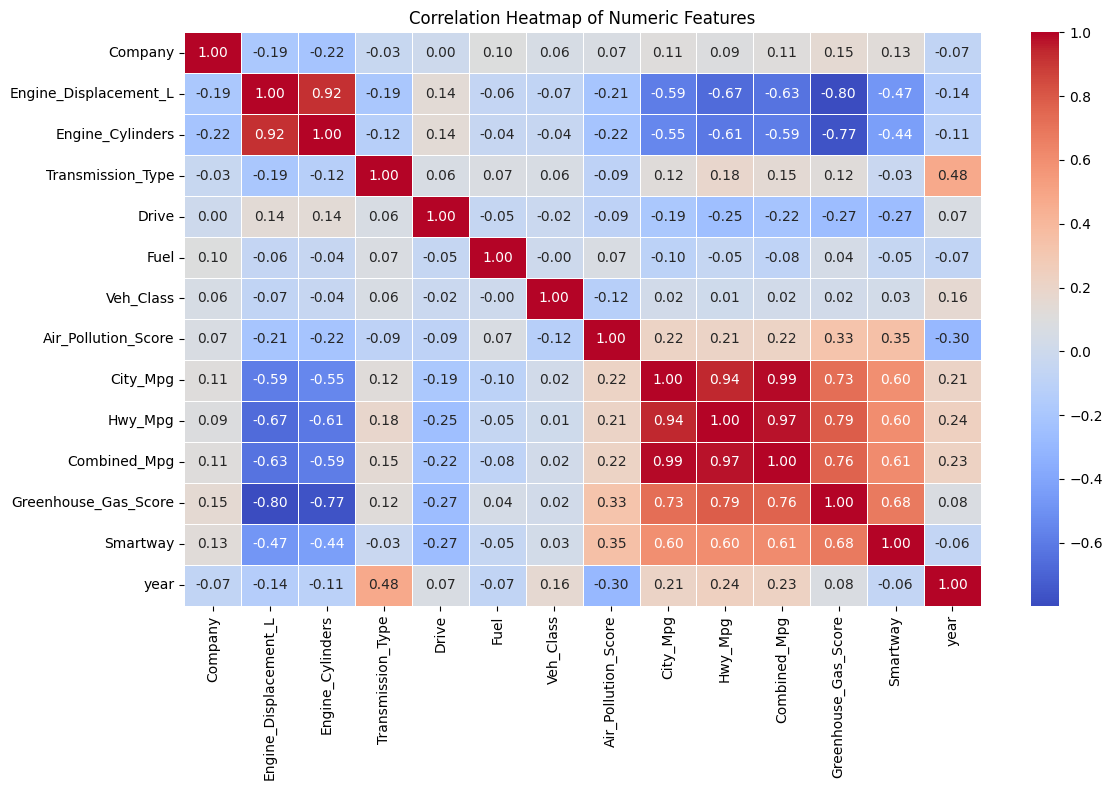

In [69]:
corr_matrix = merged_df.corr(numeric_only=True)

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Numeric Features")
plt.tight_layout()
plt.show()